In [1]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
     

In [2]:
df = pd.read_csv("Stocks.csv", encoding='utf-8')
df.head(15)

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.019697e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1.019709e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1.019711e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1.019717e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1.019718e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
5,1.019719e+18,.@RealMoney's David Butler's favorite FANG sto...,Wed Jul 18 23:04:00 +0000 2018,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,http://bit.ly/2NrYxje,True
6,1.019720e+18,Don’t miss my convo with one of my favorite th...,Wed Jul 18 23:06:58 +0000 2018,ianbremmer,HRS,Harris,https://twitter.com/samharrisorg/status/101971...,True
7,1.019721e+18,U.S. intelligence documents on Nelson Mandela ...,Wed Jul 18 23:08:45 +0000 2018,Reuters,INTC-USB,Intel*U.S.,https://reut.rs/2O0ypNf,True
8,1.019721e+18,Senate wants emergency alerts to go out throug...,Wed Jul 18 23:09:00 +0000 2018,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
9,1.019721e+18,Hedge fund manager Marc Larsy says bitcoin $40...,Wed Jul 18 23:10:41 +0000 2018,MarketWatch,BTC,Bitcoin,https://on.mktw.net/2Ntr7k9,True


In [4]:
df = df[['text']]
df

,text
0,VIDEO: “I was in my office. I was minding my o...
1,The price of lumber $LB_F is down 22% since hi...
2,Who says the American Dream is dead? https://t...
3,Barry Silbert is extremely optimistic on bitco...
4,How satellites avoid attacks and space junk wh...
...,...
10344,$VAR Stock Quote Alert for Varian Medical Syst...
10345,$NDAQ Todays trading with NASDAQ OMX Group Inc...
10346,RT @ReutersBiz: Higher credit card spending dr...
10347,Over millions of dollars are traded on Bitmex....


In [5]:
df.rename(columns = {'text':'tweet'}, inplace = True)

/tmp/ipykernel_15189/164613744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'text':'tweet'}, inplace = True)


In [6]:
df

,tweet
0,VIDEO: “I was in my office. I was minding my o...
1,The price of lumber $LB_F is down 22% since hi...
2,Who says the American Dream is dead? https://t...
3,Barry Silbert is extremely optimistic on bitco...
4,How satellites avoid attacks and space junk wh...
...,...
10344,$VAR Stock Quote Alert for Varian Medical Syst...
10345,$NDAQ Todays trading with NASDAQ OMX Group Inc...
10346,RT @ReutersBiz: Higher credit card spending dr...
10347,Over millions of dollars are traded on Bitmex....


In [8]:
df["tweet"]=df["tweet"].values.astype(str)

In [9]:
def give_emoji_free_text(text):
    emoji_list = [c for c in text if c in emoji.EMOJI_DATA]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    text = re.sub(r'http\S+', '', text)
    return text

call_emoji_free = lambda x: give_emoji_free_text(x)

df['emoji_free_tweets'] = df['tweet'].apply(call_emoji_free)

df['url_free_tweets'] = df['emoji_free_tweets'].apply(url_free_text)
     

In [10]:
nlp = spacy.load('en_core_web_lg')

In [12]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [13]:
custom_stopwords = ['hi','\n','\n\n', '&', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m','im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens

In [14]:
df

,tweet,emoji_free_tweets,url_free_tweets,tokens
0,VIDEO: “I was in my office. I was minding my o...,VIDEO: “I was in my office. I was minding my o...,VIDEO: “I was in my office. I was minding my o...,"[video:, “i, office., minding, business...”, –..."
1,The price of lumber $LB_F is down 22% since hi...,The price of lumber $LB_F is down 22% since hi...,The price of lumber $LB_F is down 22% since hi...,"[price, lumber, $lb_f, 22%, hitting, ytd, high..."
2,Who says the American Dream is dead? https://t...,Who says the American Dream is dead? https://t...,Who says the American Dream is dead?,"[says, american, dream, dead?]"
3,Barry Silbert is extremely optimistic on bitco...,Barry Silbert is extremely optimistic on bitco...,Barry Silbert is extremely optimistic on bitco...,"[barry, silbert, extremely, optimistic, bitcoi..."
4,How satellites avoid attacks and space junk wh...,How satellites avoid attacks and space junk wh...,How satellites avoid attacks and space junk wh...,"[satellites, avoid, attacks, space, junk, circ..."
...,...,...,...,...
10344,$VAR Stock Quote Alert for Varian Medical Syst...,$VAR Stock Quote Alert for Varian Medical Syst...,$VAR Stock Quote Alert for Varian Medical Syst...,"[$var, stock, quote, alert, varian, medical, s..."
10345,$NDAQ Todays trading with NASDAQ OMX Group Inc...,$NDAQ Todays trading with NASDAQ OMX Group Inc...,$NDAQ Todays trading with NASDAQ OMX Group Inc...,"[$ndaq, todays, trading, nasdaq, omx, group, i..."
10346,RT @ReutersBiz: Higher credit card spending dr...,RT @ReutersBiz: Higher credit card spending dr...,RT @ReutersBiz: Higher credit card spending dr...,"[rt, @reutersbiz:, higher, credit, card, spend..."
10347,Over millions of dollars are traded on Bitmex....,Over millions of dollars are traded on Bitmex....,Over millions of dollars are traded on Bitmex....,"[millions, dollars, traded, bitmex., join, us!..."


In [15]:
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]
def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)
     

In [16]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)
     

<>:12: DeprecationWarning: invalid escape sequence '\w'
<>:12: DeprecationWarning: invalid escape sequence '\w'
/tmp/ipykernel_15189/3831837225.py:12: DeprecationWarning: invalid escape sequence '\w'
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


In [17]:
df

,tweet,emoji_free_tweets,url_free_tweets,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,VIDEO: “I was in my office. I was minding my o...,VIDEO: “I was in my office. I was minding my o...,VIDEO: “I was in my office. I was minding my o...,"[video:, “i, office., minding, business...”, –...",video: “i office. minding business...” –david ...,"[video, office, mind, business, david, solomon...",video office mind business david solomon tell ...,"[video, office, mind, business, david, solomon..."
1,The price of lumber $LB_F is down 22% since hi...,The price of lumber $LB_F is down 22% since hi...,The price of lumber $LB_F is down 22% since hi...,"[price, lumber, $lb_f, 22%, hitting, ytd, high...",price lumber $lb_f 22% hitting ytd highs. macy...,"[price, lumber, $, lb_f, 22, hit, ytd, high, m...",price lumber $ lb_f 22 hit ytd high macy $ m t...,"[price, lumber, $, lb_f, 22, hit, ytd, high, m..."
2,Who says the American Dream is dead? https://t...,Who says the American Dream is dead? https://t...,Who says the American Dream is dead?,"[says, american, dream, dead?]",says american dream dead?,"[say, american, dream, dead]",say american dream dead,"[say, american, dream, dead]"
3,Barry Silbert is extremely optimistic on bitco...,Barry Silbert is extremely optimistic on bitco...,Barry Silbert is extremely optimistic on bitco...,"[barry, silbert, extremely, optimistic, bitcoi...",barry silbert extremely optimistic bitcoin -- ...,"[barry, silbert, extremely, optimistic, bitcoi...",barry silbert extremely optimistic bitcoin pre...,"[barry, silbert, extremely, optimistic, bitcoi..."
4,How satellites avoid attacks and space junk wh...,How satellites avoid attacks and space junk wh...,How satellites avoid attacks and space junk wh...,"[satellites, avoid, attacks, space, junk, circ...",satellites avoid attacks space junk circling e...,"[satellite, avoid, attack, space, junk, circle...",satellite avoid attack space junk circle earth...,"[satellite, avoid, attack, space, junk, circle..."
...,...,...,...,...,...,...,...,...
10344,$VAR Stock Quote Alert for Varian Medical Syst...,$VAR Stock Quote Alert for Varian Medical Syst...,$VAR Stock Quote Alert for Varian Medical Syst...,"[$var, stock, quote, alert, varian, medical, s...",$var stock quote alert varian medical systems ...,"[$, var, stock, quote, alert, varian, medical,...",$ var stock quote alert varian medical systems...,"[$, var, stock, quote, alert, varian, medical,..."
10345,$NDAQ Todays trading with NASDAQ OMX Group Inc...,$NDAQ Todays trading with NASDAQ OMX Group Inc...,$NDAQ Todays trading with NASDAQ OMX Group Inc...,"[$ndaq, todays, trading, nasdaq, omx, group, i...",$ndaq todays trading nasdaq omx group inc $95....,"[$, ndaq, todays, trade, nasdaq, omx, group, i...",$ ndaq todays trade nasdaq omx group inc $ 95....,"[$, ndaq, todays, trade, nasdaq, omx, group, i..."
10346,RT @ReutersBiz: Higher credit card spending dr...,RT @ReutersBiz: Higher credit card spending dr...,RT @ReutersBiz: Higher credit card spending dr...,"[rt, @reutersbiz:, higher, credit, card, spend...",rt @reutersbiz: higher credit card spending dr...,"[rt, @reutersbiz, high, credit, card, spending...",rt @reutersbiz high credit card spending drive...,"[rt, reutersbiz, high, credit, card, spending,..."
10347,Over millions of dollars are traded on Bitmex....,Over millions of dollars are traded on Bitmex....,Over millions of dollars are traded on Bitmex....,"[millions, dollars, traded, bitmex., join, us!...",millions dollars traded bitmex. join us! regis...,"[million, dollar, trade, bitmex, join, registe...",million dollar trade bitmex join register bonu...,"[million, dollar, trade, bitmex, join, registe..."


## Topic Modeling

In [18]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print(len(id2word))

16634


In [19]:
id2word

In [20]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

7850


In [21]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]

In [22]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

In [23]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [24]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [25]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
$ rt earning stock 2018 inc analyst investment research zacks

------ Topic 1 ------
$ jul +0000 18 inc rt corporation expect 13 earning

------ Topic 2 ------
$ register bonus rt binance trade today fee stock short

------ Topic 3 ------
$ inc stock rt option high jul alert +0000 amp

------ Topic 4 ------
$ ^ amp join group price de pay rt +



In [26]:
topics

['$ rt earning stock 2018 inc analyst investment research zacks',
 '$ jul +0000 18 inc rt corporation expect 13 earning',
 '$ register bonus rt binance trade today fee stock short',
 '$ inc stock rt option high jul alert +0000 amp',
 '$ ^ amp join group price de pay rt +']

In [27]:
t=[]
for i in topics:
    tmp = i.split()
    t.extend(tmp)

In [28]:
from wordcloud import WordCloud

In [31]:
wordcloud = WordCloud(background_color='lightyellow',width = 2000, height = 1000).generate(' '.join(t))

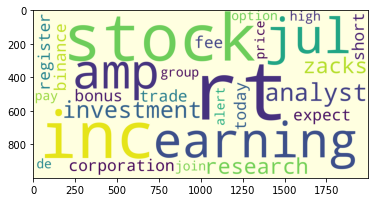

In [32]:
plt.imshow(wordcloud)

Thank you